In [1]:
# import dependecies and setup
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st
import os

# select two (tripA and tripB) trip start and end dates in yyyy-mm-dd format used in temperture analysis II
# consider for dates in June and December of the same year for purpose of decision making
tripA = ["2017-06-11", "2017-06-22"]
tripB = ["2017-12-11", "2017-12-22"]

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine using the hawaii.sqlite database file
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [4]:
# declare Base using automap_base() to define how a table should look
Base = automap_base()

# use the base class to reflect the database table
Base.prepare(engine, reflect=True)

In [5]:
# view all of the classes that automap found within database
Base.classes.keys()

['measurement', 'station']

In [6]:
# assign the measurement class to a variable called Measurement
Measurement = Base.classes.measurement

# assign the station class to a variable called Station
Station = Base.classes.station

In [7]:
# view the columns associate with the table Measurement
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [8]:
# view the columns associate with the table Station
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [9]:
# create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# display the first row's column headers and data in dictionary format for table Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29e4bf49040>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08}

In [11]:
# display the first row's column headers and data in dictionary format for table Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29e4bf49e20>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Query

## Precipitation Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [13]:
# query for the last date in the measurement table 
date_ml = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# convert result type to string 
date_ml = str(date_ml)

# parse string index for month, year, and day to assign as date type
date_ml = dt.date(int(date_ml[2:6]),int(date_ml[7:9]),int(date_ml[10:12]))

# define date for 1 year prior to date_ml
query_date = date_ml - dt.timedelta(days=365)

# retrieve the last 12 months of precipitation data (select date and prcp values)
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

# save the query results as a Pandas DataFrame and set the index to the date column
df_precip_i = pd.DataFrame(precip)
df_precip = df_precip_i.set_index("date")
df_precip = df_precip.sort_index()
df_precip

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [14]:
# Generate a date average precipitation summary by grouping the date column
df_group = df_precip_i.groupby(["date"])
df_date = df_group["prcp"].mean().reset_index()
df_date.sort_values(by="prcp",ascending=False)

,date,prcp
22,2016-09-14,2.380000
172,2017-02-11,1.866667
173,2017-02-12,1.746667
190,2017-03-01,1.660000
1,2016-08-24,1.555000
...,...,...
165,2017-02-04,0.000000
166,2017-02-05,0.000000
171,2017-02-10,0.000000
245,2017-04-25,0.000000


In [15]:
date_uni = df_precip.index.unique()
date_tick = []
date_tick.append(date_uni[0])
interval = round(len(date_uni)/12)
for i in range(11):
    date_tick.append(date_uni[(i+1)*interval])
date_tick.append(date_uni[len(date_uni)-1])
date_tick    

['2016-08-23',
 '2016-09-22',
 '2016-10-22',
 '2016-11-21',
 '2016-12-21',
 '2017-01-20',
 '2017-02-19',
 '2017-03-21',
 '2017-04-20',
 '2017-05-20',
 '2017-06-19',
 '2017-07-19',
 '2017-08-23']

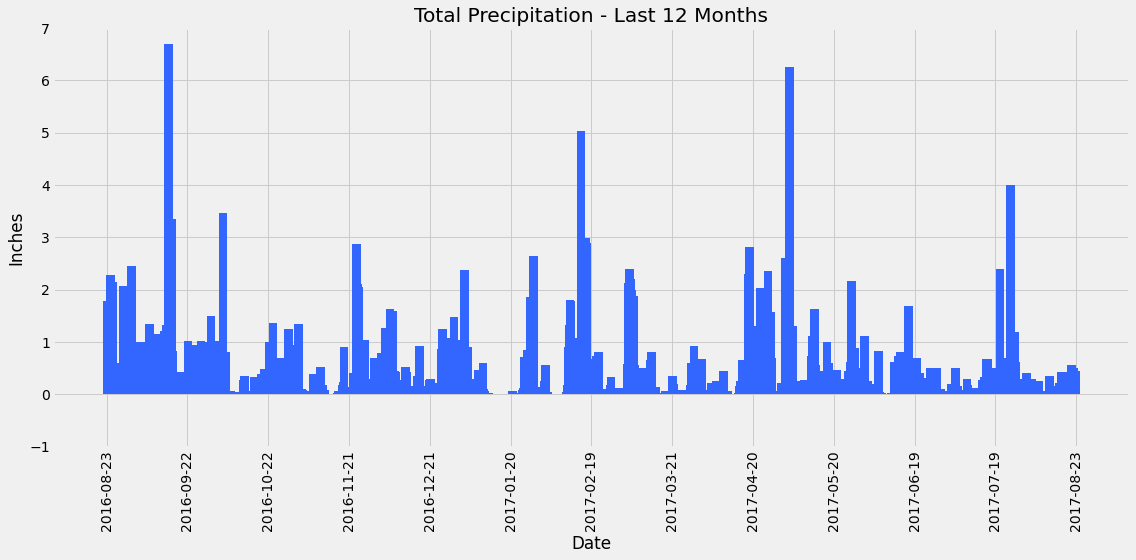

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data - Last 12 Months
x_axis = np.arange(len(df_precip))
x_tick = np.linspace(0,len(df_precip),13)
plt.figure(figsize=(16,8))
plt.bar(x=x_axis,height=df_precip["prcp"], color='#3366FF', alpha=1, align="center", width=20)
plt.xticks(x_tick, date_tick, rotation=90)
plt.ylim(-1,round(max(df_precip["prcp"])))
plt.title("Total Precipitation - Last 12 Months")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.tight_layout()

plt.savefig(os.path.join("images","precipitation_total_lm12.png"))

plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data - LAST 12 Months
f_count = []
f_mean = []
f_std = []
f_min = []
f_q1 = []
f_q2 = []
f_q3 = []
f_max = []

for i in range(0,1):
    df_prcps = df_precip.iloc[:,i]
    f_count.append(len(df_prcps))
    quantiles = df_prcps.quantile([.25,.5,.75], interpolation="midpoint")
    f_q1.append(quantiles.iloc[0])
    f_q2.append(quantiles.iloc[1]) 
    f_q3.append(quantiles.iloc[2])
    df_prcps_agg = df_prcps.agg([np.mean, np.std, np.min, np.max])
    f_mean.append(df_prcps_agg[0])
    f_std.append(df_prcps_agg[1])
    f_min.append(df_prcps_agg[2])
    f_max.append(df_prcps_agg[3])


stats = {
        "count": f_count, 
        "mean": f_mean,
        "std": f_std,
        "min": f_min,
        "25%": f_q1,
        "50%": f_q2,
        "75%": f_q3,
        "max": f_max
}

df_stats = pd.DataFrame(stats)
df_stats = df_stats.T
df_stats.columns = ['Precipitation (inches)']
df_stats

,Precipitation (inches)
count,2230.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# query for ALL the precipitation data in the measurement table 
precip_all = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc())

# save the query results as a Pandas DataFrame and set the index to the date column
df_precip_ia = pd.DataFrame(precip_all)
df_precip_all = df_precip_ia.set_index("date")
df_precip_all = df_precip_all.sort_index()
df_precip_all

,prcp
date,
2010-01-01,0.14
2010-01-01,0.08
2010-01-01,0.28
2010-01-01,0.05
2010-01-01,0.15
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data - OVERALL
f_count = []
f_mean = []
f_std = []
f_min = []
f_q1 = []
f_q2 = []
f_q3 = []
f_max = []

for i in range(0,1):
    df_prcps = df_precip_all.iloc[:,i]
    f_count.append(len(df_prcps))
    quantiles = df_prcps.quantile([.25,.5,.75], interpolation="midpoint")
    f_q1.append(quantiles.iloc[0])
    f_q2.append(quantiles.iloc[1]) 
    f_q3.append(quantiles.iloc[2])
    df_prcps_agg = df_prcps.agg([np.mean, np.std, np.min, np.max])
    f_mean.append(df_prcps_agg[0])
    f_std.append(df_prcps_agg[1])
    f_min.append(df_prcps_agg[2])
    f_max.append(df_prcps_agg[3])


stats = {
        "count": f_count, 
        "mean": f_mean,
        "std": f_std,
        "min": f_min,
        "25%": f_q1,
        "50%": f_q2,
        "75%": f_q3,
        "max": f_max
}

df_stats = pd.DataFrame(stats)
df_stats = df_stats.T
df_stats.columns = ['Precipitation (inches)']
df_stats

,Precipitation (inches)
count,19550.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


## Station Analysis

In [20]:
# design a query to show how many stations are available in this dataset?
total_st = session.query(Station.id).count()
print(f'There are {total_st} unique stations identified by using station table')

total_mst = session.query(Measurement.station).count()
print(f'There are {total_mst} total stations measured overall')

There are 9 unique stations identified by using station table
There are 19550 total stations measured overall


In [21]:
# another way to query and print the number of unique stations by using measurement table
station_qry = session.query(Measurement).group_by(Measurement.station).count()
print(f'There are {station_qry} unique stations identified by using measurement table')

There are 9 unique stations identified by using measurement table


In [22]:
# what are the most active stations? (i.e. what stations have the most rows)?
# list the stations and the counts in descending order.
# first method
station = session.query(Measurement.station,Measurement.tobs)
df_station = pd.DataFrame(station)
df_group_st = df_station.groupby(['station'])
df_active = df_group_st['station'].count()
df_active = pd.DataFrame(df_active)
df_active2 = df_active.rename({'station': 'count'},axis=1)
df_active2 = df_active2.sort_values(by='count',ascending=False)
df_active2

,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [23]:
# another way to query the most active stations using func.count
# list the stations and the counts in descending order.
# second method
station_qry2 = session.query(Measurement.station, func.count(Measurement.tobs).label("count")).\
                                group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
df_active_qry2 = pd.DataFrame(station_qry2)
df_active_qry2.set_index('station')

,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [24]:
# assign most active station as the highest count from above tables in both methods
st_h = df_active2.index[0]
print(f'The most active station using first method is {st_h}')

st_h2 = df_active_qry2['station'][0]
print(f'The most active station using second method is {st_h2}')

The most active station using first method is USC00519281
The most active station using second method is USC00519281


In [25]:
# using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station? 
# first method
df_temp_min = df_group_st['tobs'].min()
df_temp_max = df_group_st['tobs'].max()
df_temp_avg = df_group_st['tobs'].mean()

tmin = [i for i in range(len(df_temp_min)) if df_temp_min.index[i] == st_h]
tmax = [i for i in range(len(df_temp_max)) if df_temp_max.index[i] == st_h]
tavg = [i for i in range(len(df_temp_avg)) if df_temp_avg.index[i] == st_h]

stats_h = {
    "min": df_temp_min[tmin[0]],
    "max": df_temp_max[tmax[0]],
    "mean": round(df_temp_avg[tavg[0]],1)
}

df_stats_h = pd.DataFrame(stats_h, index=['Temperature (F)'])
df_stats_h = df_stats_h.T
df_stats_h.index.names = [f'station: {st_h}']
df_stats_h

,Temperature (F)
station: USC00519281,
min,54.0
max,85.0
mean,71.7


In [26]:
# another way to query temperature stats of the most active station using func.min, func.max, and func.avg
# second method
station_temp_qry = session.query(Measurement.station, 
                                 func.min(Measurement.tobs),
                                 func.max(Measurement.tobs),
                                 func.avg(Measurement.tobs)).\
                                 filter(Measurement.station == st_h).group_by(Measurement.station).all()

df_stq = pd.DataFrame(station_temp_qry, columns=['station','min','max','mean'])
df_stq.set_index('station', inplace=True)
df_stq = df_stq.T
df_stq.index.names = [f'station: {st_h}']
df_stq.columns = ['Temperature (F)']
df_stq = df_stq.round({'Temperature (F)': 1})
df_stq

,Temperature (F)
station: USC00519281,
min,54.0
max,85.0
mean,71.7


In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_qry2 = session.query(Measurement.tobs,
                                  func.count(Measurement.tobs).label('Frequency')).\
                                    filter(Measurement.station == st_h, Measurement.date >= query_date).\
                                    group_by(Measurement.tobs).all()

df_stqf = pd.DataFrame(station_temp_qry2)
df_stqf['tobs'] = pd.to_numeric(df_stqf['tobs'], downcast='integer')
df_stqf = df_stqf.rename(columns={'tobs':'Temperature (F)'})
df_stqf.set_index('Temperature (F)', inplace=True)
df_stqf.head()

,Frequency
Temperature (F),
59,3
60,2
61,1
62,6
63,4


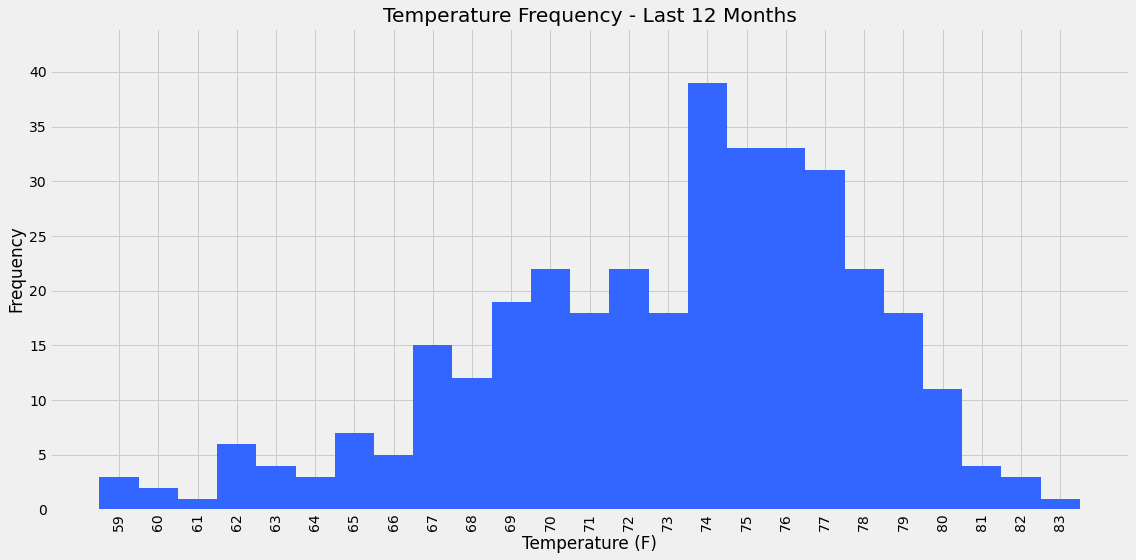

In [28]:
# use Pandas bar plotting with Matplotlib to plot the data - Last 12 Months
x_axis = np.arange(len(df_stqf))
plt.figure(figsize=(16,8))
plt.bar(x=x_axis,height=df_stqf["Frequency"], color='#3366FF', alpha=1, align="center", width=1)
plt.xticks(x_axis, df_stqf.index, rotation=90)
plt.ylim(0,max(df_stqf["Frequency"])+5)
plt.title("Temperature Frequency - Last 12 Months")
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.tight_layout()

plt.savefig(os.path.join("images","temperature_frequency_lm12.png"))

plt.show()

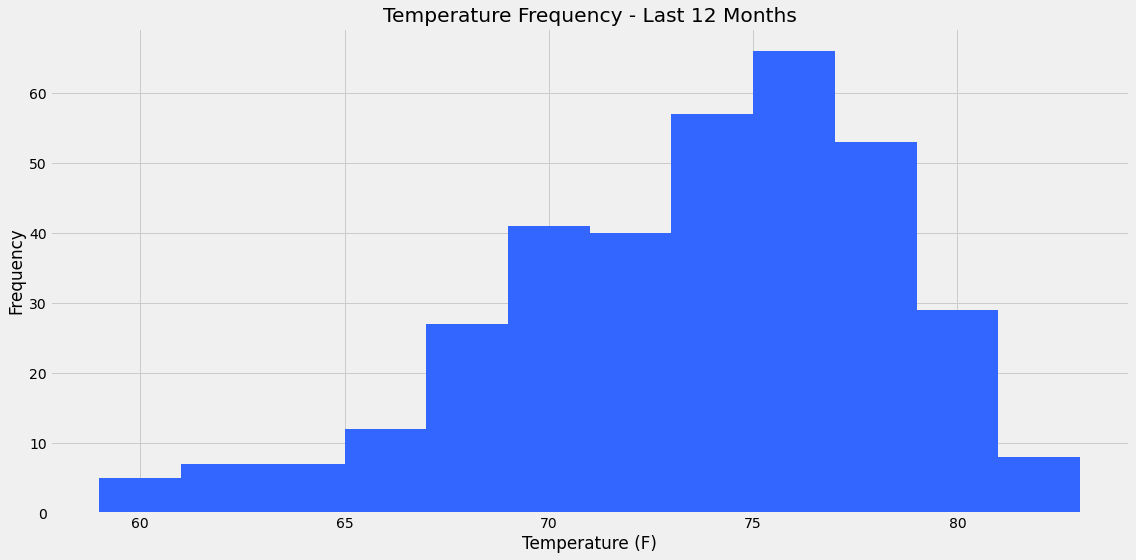

In [29]:
# Plot the results as a histogram with bins = 12, last 12 months
plt.figure(figsize=(16,8))
plt.hist(df_stqf.index, weights=df_stqf['Frequency'], bins=12, color='#3366FF')
plt.title("Temperature Frequency - Last 12 Months")
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.tight_layout()

plt.savefig(os.path.join("images","temperature_frequency_hist_lm12.png"))

plt.show()

# Climate App

<center>Flask API app file click here <a href="app_ra.py" target="_blank">app_ra.py</a><br>
<center>Climate API website click here <a href="http://localhost:5000" target="_blank">Climate API homepage</a>

# Bonus: Other Recommended Analysis

## Temperature Analysis I

In [30]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.

Mth1 = 6
day1 = 30

Mth2 = 12
day2 = 31

# query for the last date in the measurement table 
date_ml = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date_mf = session.query(Measurement.date).order_by(Measurement.date).first()

# convert result type to string 
date_ml = str(date_ml)
date_mf = str(date_mf)

# parse start and end year in the dataset
YS = int(date_mf[2:6])
YE = int(date_ml[2:6])
ME = int(date_ml[7:9])

# assign and convert mth1 and mth2 to date type list using the YS and YE for year and at day 1
datef1 = []
datef2 = []
for i in range(YE-YS+1):
    if YS+i == YE and Mth1 > ME:
        print(f'out of range {Mth1}-{YE}')
        print("")
    else:
        datef1.append(dt.date(YS+i,Mth1,1))
        datef1.append(dt.date(YS+i,Mth1,day1))
        
    if YS+i == YE and Mth2 > ME:
        print(f'out of range {Mth2}-{YE}')
        print("")
    else:
        datef2.append(dt.date(YS+i,Mth2,1))
        datef2.append(dt.date(YS+i,Mth2,day2))
    
# retrieve average temperature for each year of the month(s) selected and add to list of dictionary representation 
all_tobs1 = []
for i in range(len(datef1)-1):
    tobs_dict = {}
    if i % 2 == 0:
        tobs_dict["Year"] = datef1[i].year
        tobs_dict["Average Temperature (F)"] = session.query(func.avg(Measurement.tobs)).\
                                filter(Measurement.date >= datef1[i], Measurement.date <= datef1[i+1]).all()[0][0]
        all_tobs1.append(tobs_dict)

all_tobs2 = []
for i in range(len(datef2)-1):
    tobs_dict = {}
    if i % 2 == 0:
        tobs_dict["Year"] = datef2[i].year
        tobs_dict["Average Temperature (F)"] = session.query(func.avg(Measurement.tobs)).\
                                filter(Measurement.date >= datef2[i], Measurement.date <= datef2[i+1]).all()[0][0]
        all_tobs2.append(tobs_dict)

df_tobs1 = pd.DataFrame(all_tobs1)
df_tobs1 = df_tobs1.set_index("Year")
df_tobs2 = pd.DataFrame(all_tobs2)
df_tobs2 = df_tobs2.set_index("Year")

print(df_tobs1)
print("")
print(df_tobs2)

out of range 12-2017

      Average Temperature (F)
Year                         
2010                74.925620
2011                73.938326
2012                74.000000
2013                74.599078
2014                75.027907
2015                74.990148
2016                75.175258
2017                77.219895

      Average Temperature (F)
Year                         
2010                70.208511
2011                70.820628
2012                71.188073
2013                71.094017
2014                69.896861
2015                73.423913
2016                71.130000


Selected Month: 6
The line of best fit: y = 0.31x + -539.7
The r-squared is: 0.5398306647559504

Selected Month: 12
The line of best fit: y = 0.24x + -409.12
The r-squared is: 0.20617953557303345


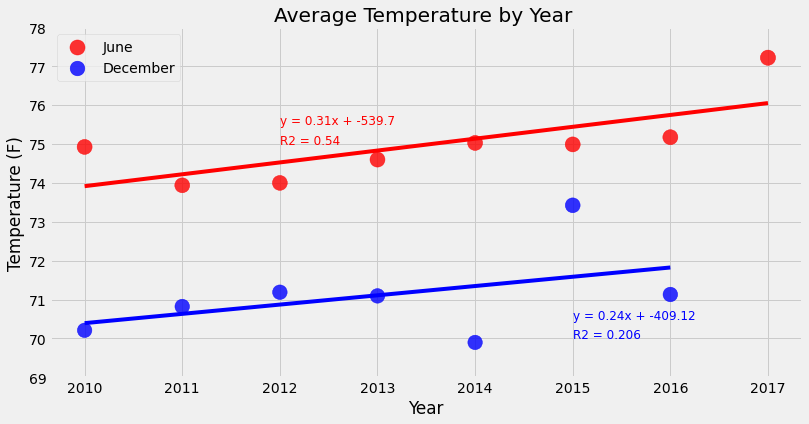

In [31]:
# Set the size of the plot (width, height) 
plt.figure(figsize=(12,6))

# Set title/labels
plt.title('Average Temperature by Year ')
plt.ylabel('Temperature (F)')
plt.xlabel('Year')

# Create a scatter plot
plt.scatter(df_tobs1.index, df_tobs1["Average Temperature (F)"], marker="o", 
            facecolors="red", edgecolors="red", s=np.array(df_tobs1)*3, alpha=0.8)

plt.scatter(df_tobs2.index, df_tobs2["Average Temperature (F)"], marker="o", 
            facecolors="blue", edgecolors="blue", s=np.array(df_tobs2)*3, alpha=0.8)

plt.legend(['June', 'December'], loc='upper left')

# Set y limits
plt.ylim(round(min(df_tobs2['Average Temperature (F)']))-1, round(max(df_tobs1['Average Temperature (F)']))+1)

# ---
# assign axis values for use with regression lines 
x_values = df_tobs1.index
x_values2 = df_tobs2.index

y_values = df_tobs1["Average Temperature (F)"]
y_values2 = df_tobs2["Average Temperature (F)"]

# Run the regression and store each of the returned values for each month
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
slope2, intercept2, rvalue2, pvalue2, stderr2 = st.linregress(x_values2, y_values2)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept
regression_values2 = x_values2 * slope2 + intercept2

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

# Plot the regression lines
plt.plot(x_values, regression_values, "red")
plt.plot(x_values2, regression_values2, "blue")

# Add the linear equations to the plot
plt.annotate(line_eq, (2012,75.5), fontsize=12, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (2012,75), fontsize=12, color="red")
plt.annotate(line_eq2, (2015,70.5), fontsize=12, color="blue")
plt.annotate(f"R2 = {round(rvalue2**2,3)}", (2015,70), fontsize=12, color="blue")

print(f"Selected Month: {Mth1}")
print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")
print("")
print(f"Selected Month: {Mth2}")
print(f"The line of best fit: {line_eq2}")
print(f"The r-squared is: {rvalue2**2}")

# Save the chart
plt.savefig(os.path.join("images","scatter_temp_year_dataset.png"))

# Show the chart
plt.show()

In [32]:
correlation1 = st.pearsonr(df_tobs1.index, df_tobs1["Average Temperature (F)"])
correlation2 = st.pearsonr(df_tobs2.index, df_tobs2["Average Temperature (F)"])

print(f"Selected Month: {Mth1}")
print(f"The correlation coefficient (r) is {round(correlation1[0],2)}")
print(f"The p-value is {correlation1[1]}")
print("")
print(f"Selected Month: {Mth2}")
print(f"The correlation coefficient (r) is {round(correlation2[0],2)}")
print(f"The p-value is {correlation2[1]}")

Selected Month: 6
The correlation coefficient (r) is 0.73
The p-value is 0.03787391475922254

Selected Month: 12
The correlation coefficient (r) is 0.45
The p-value is 0.30609198501762075


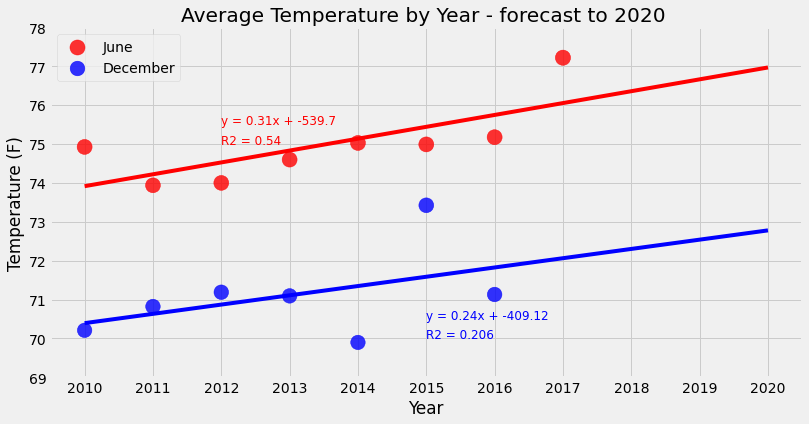

In [33]:
# Plot a forecasted model for year selected by user input or set in code
#x_year = int(input('Enter a year to forecast: '))
x_year = 2020

# create the list of years to plot 
x_years = np.arange(min(df_tobs1.index),x_year+1,1)
years = pd.Series(x_years)

# Set the size of the plot (width, height) 
plt.figure(figsize=(12,6))

# Set title/labels
plt.title(f'Average Temperature by Year - forecast to {x_year} ')
plt.ylabel('Temperature (F)')
plt.xlabel('Year')

# Create a scatter plot
plt.scatter(df_tobs1.index, df_tobs1["Average Temperature (F)"], marker="o", 
            facecolors="red", edgecolors="red", s=np.array(df_tobs1)*3, alpha=0.8)

plt.scatter(df_tobs2.index, df_tobs2["Average Temperature (F)"], marker="o", 
            facecolors="blue", edgecolors="blue", s=np.array(df_tobs2)*3, alpha=0.8)

plt.xticks(years)

plt.legend(['June', 'December'], loc='upper left')

# Set y limits
plt.ylim(round(min(df_tobs2['Average Temperature (F)']))-1, round(max(df_tobs1['Average Temperature (F)']))+1)

# ---
# assign axis values for use with regression lines 
x_values = df_tobs1.index
x_values2 = df_tobs2.index

y_values = df_tobs1["Average Temperature (F)"]
y_values2 = df_tobs2["Average Temperature (F)"]

# Run the regression and store each of the returned values for each month
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
slope2, intercept2, rvalue2, pvalue2, stderr2 = st.linregress(x_values2, y_values2)

# Calculate the predictions for each value of x (# Rooms)
regression_values = years * slope + intercept
regression_values2 = years * slope2 + intercept2

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

# Plot the regression lines
plt.plot(years, regression_values, "red")
plt.plot(years, regression_values2, "blue")

# Add the linear equations to the plot
plt.annotate(line_eq, (2012,75.5), fontsize=12, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (2012,75), fontsize=12, color="red")
plt.annotate(line_eq2, (2015,70.5), fontsize=12, color="blue")
plt.annotate(f"R2 = {round(rvalue2**2,3)}", (2015,70), fontsize=12, color="blue")

# Save the chart
plt.savefig(os.path.join("images","scatter_temp_year_forecast_" + str(x_year) + ".png"))

# Show the chart
plt.show()

## Temperature Analysis II

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs), func.count(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0, 56)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# calculate and assign start and end dates for Trip A selection of previous year
prev_startA = dt.date(int(tripA[0][0:4]),int(tripA[0][5:7]),int(tripA[0][8:11])) - dt.timedelta(days=365)
prev_endA = dt.date(int(tripA[1][0:4]),int(tripA[1][5:7]),int(tripA[1][8:11])) - dt.timedelta(days=365)
# calculate number of days between selected start and end dates
tripA_days = (prev_endA - prev_startA).days
# call function to retrieve temperature stats
tripA_stats = calc_temps(prev_startA, prev_endA)

# calculate and assign start and end dates Trip B selection of previous year
prev_startB = dt.date(int(tripB[0][0:4]),int(tripB[0][5:7]),int(tripB[0][8:11])) - dt.timedelta(days=365)
prev_endB = dt.date(int(tripB[1][0:4]),int(tripB[1][5:7]),int(tripB[1][8:11])) - dt.timedelta(days=365)
# calculate number of days between selected start and end dates
tripB_days = (prev_endB - prev_startB).days
# call function to retrieve temperature stats
tripB_stats = calc_temps(prev_startB, prev_endB)

# print previous year's temperature stats for dates selected
# Trip A selection
print(f'Your trip selected is set to begin on {tripA[0]}, and end on {tripA[1]}')
if tripA_stats[0][3] > 0:
    print("Previous year temperature (F) values:")
    print(f'Min: {tripA_stats[0][0]}')
    print(f'Mean: {round(tripA_stats[0][1],1)}')
    print(f'Max: {tripA_stats[0][2]}')
else:
    print("ERROR: date selected is out of range for the previous year")
print("")

# Trip B selection
print(f'Your trip selected is set to begin on {tripB[0]}, and end on {tripB[1]}')
if tripB_stats[0][3] > 0:
    print("Previous year temperature (F) values:")
    print(f'Min: {tripB_stats[0][0]}')
    print(f'Mean: {round(tripB_stats[0][1],1)}')
    print(f'Max: {tripB_stats[0][2]}')
else:
    print("ERROR: date selected is out of range for the previous year")

Your trip selected is set to begin on 2017-06-11, and end on 2017-06-22
Previous year temperature (F) values:
Min: 69.0
Mean: 75.9
Max: 81.0

Your trip selected is set to begin on 2017-12-11, and end on 2017-12-22
Previous year temperature (F) values:
Min: 60.0
Mean: 70.6
Max: 78.0


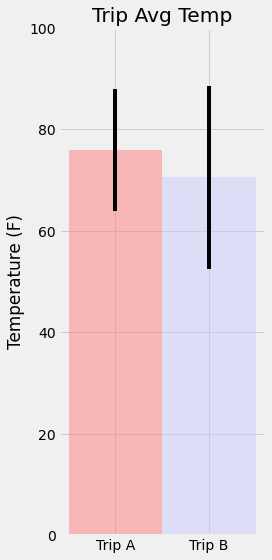

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Use Pandas Plotting with Matplotlib to plot the selected trip data - Trip Avg Temp
plt.figure(figsize=(4,8))

# calculate peak-to-peak delta and check if date range is within dataset otherwise print out of range
if tripA_stats[0][3] > 0:
    deltaA = tripA_stats[0][2]-tripA_stats[0][0]
    plt.bar(x="Trip A",height=tripA_stats[0][1], yerr=deltaA, color='#FF8080', alpha=0.5, align="center", width=1)
else:
    print("ERROR: date selected for 'Trip A' is out of range for the previous year")
    
if tripB_stats[0][3] > 0:
    deltaB = tripB_stats[0][2]-tripB_stats[0][0]
    plt.bar(x="Trip B",height=tripB_stats[0][1], yerr=deltaB, color='#CCCCFF', alpha=0.5, align="center", width=1)
else:
    print("ERROR: date selected for 'Trip B' is out of range for the previous year")

#plt.tick_params(axis='x', labelbottom=False)
plt.ylim(0,100)
plt.title("Trip Avg Temp")
plt.ylabel("Temperature (F)")
plt.tight_layout()

plt.savefig(os.path.join("images","trip_avg_temp_" + tripA[0] + "_or_" + tripB[0] + ".png"))

plt.show()

## Daily Temperature Average

In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

normalsA = []
for i in range(tripA_days+1):
        date_ls = {}
        date_x = prev_startA + dt.timedelta(days=i)
        date_xf = "{:02d}".format(date_x.month) + "-" + "{:02d}".format(date_x.day)
        date_ls['Date'] = date_xf
        date_ls['tmin'] = daily_normals(date_xf)[0][0]
        date_ls['tavg'] = daily_normals(date_xf)[0][1]
        date_ls['tmax'] = daily_normals(date_xf)[0][2]
        normalsA.append(date_ls)

normalsB = []
for i in range(tripB_days+1):
        date_ls = {}
        date_x = prev_startB + dt.timedelta(days=i)
        date_xf = "{:02d}".format(date_x.month) + "-" + "{:02d}".format(date_x.day)
        date_ls['Date'] = date_xf
        date_ls['tmin'] = daily_normals(date_xf)[0][0]
        date_ls['tavg'] = daily_normals(date_xf)[0][1]
        date_ls['tmax'] = daily_normals(date_xf)[0][2]
        normalsB.append(date_ls)

# Load the previous query results into a Pandas DataFrame for both trips
df_normalA = pd.DataFrame(normalsA)
df_normalB = pd.DataFrame(normalsB)

print(df_normalA.head())
print("")
print(df_normalB.head())

    Date  tmin       tavg  tmax
0  06-11  69.0  76.019608  84.0
1  06-12  66.0  75.666667  83.0
2  06-13  68.0  75.666667  81.0
3  06-14  69.0  75.627119  81.0
4  06-15  67.0  75.403509  81.0

    Date  tmin       tavg  tmax
0  12-11  64.0  72.387755  78.0
1  12-12  64.0  70.882353  79.0
2  12-13  65.0  70.942308  80.0
3  12-14  65.0  71.180000  78.0
4  12-15  62.0  71.340000  79.0


In [39]:
# add the Trip A `trip_dates` range as the `date` index
df_normalAi = df_normalA.set_index("Date")
df_normalAi

,tmin,tavg,tmax
Date,,,
06-11,69.0,76.019608,84.0
06-12,66.0,75.666667,83.0
06-13,68.0,75.666667,81.0
06-14,69.0,75.627119,81.0
06-15,67.0,75.403509,81.0
06-16,69.0,75.413793,81.0
06-17,68.0,74.593220,81.0
06-18,69.0,74.603448,80.0
06-19,70.0,75.440678,82.0


In [40]:
# add the trip B `trip_dates` range as the `date` index
df_normalBi = df_normalB.set_index("Date")
df_normalBi

,tmin,tavg,tmax
Date,,,
12-11,64.0,72.387755,78.0
12-12,64.0,70.882353,79.0
12-13,65.0,70.942308,80.0
12-14,65.0,71.180000,78.0
12-15,62.0,71.340000,79.0
12-16,60.0,69.622642,82.0
12-17,63.0,70.640000,77.0
12-18,63.0,71.280000,77.0
12-19,67.0,72.000000,78.0


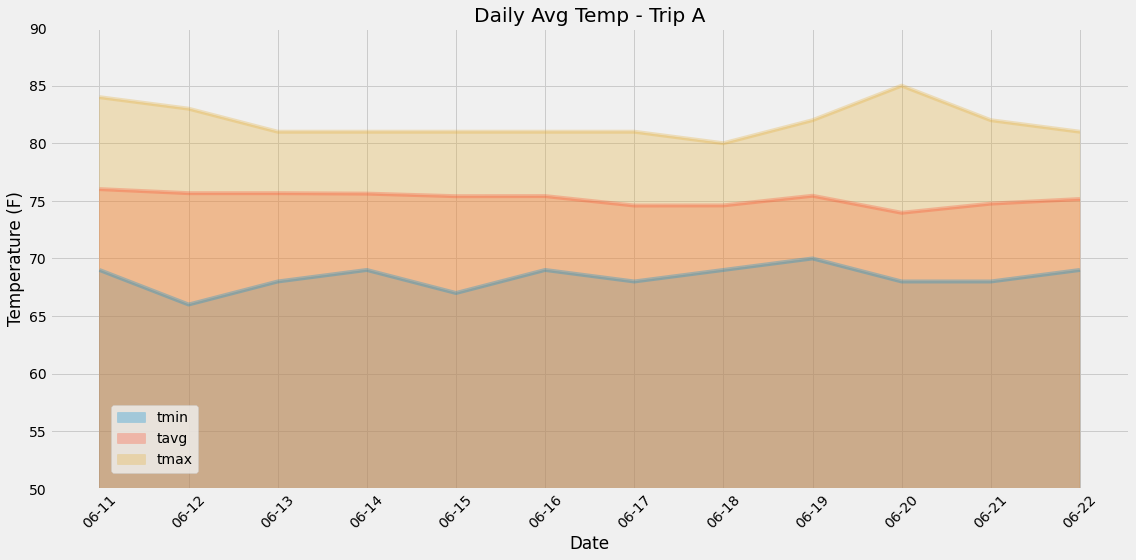

In [41]:
# Plot the daily normals for Trip A as an area plot with `stacked=False`
# Use Pandas dataframe area plotting to plot the selected trip data - Daily Avg Temp - Trip A
x_axis = np.arange(len(df_normalAi))
df_normalAi.plot(kind='area', figsize=(16,8), stacked=False, alpha=0.3)
plt.xticks(x_axis,df_normalAi.index, rotation=45)
plt.ylim(50,90)
plt.legend(loc='lower left', bbox_to_anchor=(0.05,0.02))
plt.title("Daily Avg Temp - Trip A")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.tight_layout()

plt.savefig(os.path.join("images","daily_avg_temp_tripA_" + tripA[0] + ".png"))

plt.show()

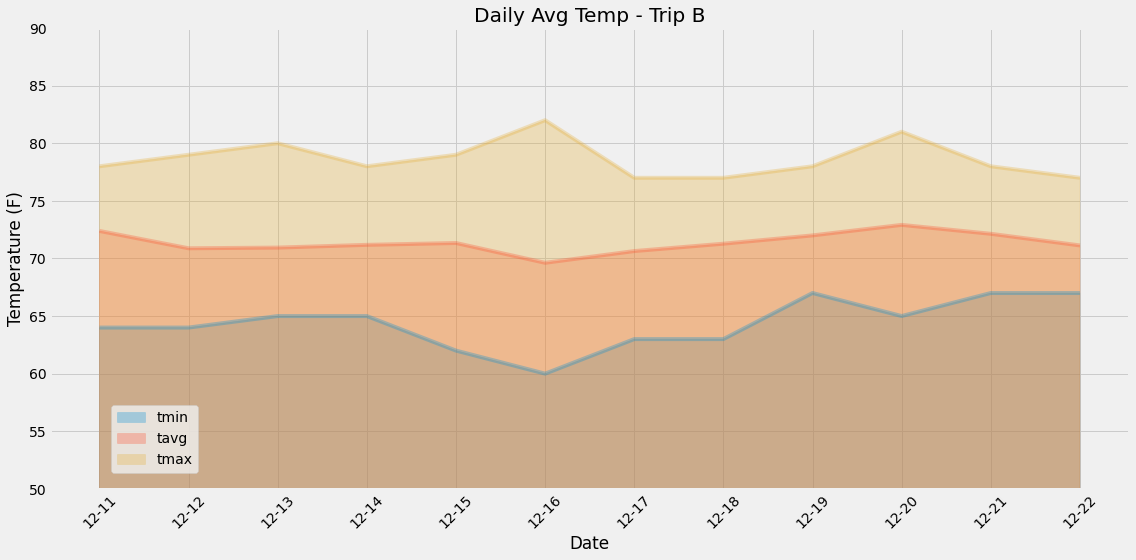

In [42]:
# Plot the daily normals for Trip A as an area plot with `stacked=False`
# Use Pandas dataframe area plotting to plot the selected trip data - Daily Avg Temp - Trip B
x_axis = np.arange(len(df_normalBi))
df_normalBi.plot(kind='area', figsize=(16,8), stacked=False, alpha=0.3)
plt.xticks(x_axis,df_normalBi.index, rotation=45)
plt.ylim(50,90)
plt.legend(loc='lower left', bbox_to_anchor=(0.05,0.02))
plt.title("Daily Avg Temp - Trip B")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.tight_layout()

plt.savefig(os.path.join("images","daily_avg_temp_tripB_" + tripB[0] + ".png"))

plt.show()

## Daily Rainfall Average

In [43]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals_prcp(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [44]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

normalsA = []
for i in range(tripA_days+1):
        date_ls = {}
        date_x = prev_startA + dt.timedelta(days=i)
        date_xf = "{:02d}".format(date_x.month) + "-" + "{:02d}".format(date_x.day)
        date_ls['Date'] = date_xf
        date_ls['tmin'] = daily_normals_prcp(date_xf)[0][0]
        date_ls['tavg'] = daily_normals_prcp(date_xf)[0][1]
        date_ls['tmax'] = daily_normals_prcp(date_xf)[0][2]
        normalsA.append(date_ls)

normalsB = []
for i in range(tripB_days+1):
        date_ls = {}
        date_x = prev_startB + dt.timedelta(days=i)
        date_xf = "{:02d}".format(date_x.month) + "-" + "{:02d}".format(date_x.day)
        date_ls['Date'] = date_xf
        date_ls['tmin'] = daily_normals_prcp(date_xf)[0][0]
        date_ls['tavg'] = daily_normals_prcp(date_xf)[0][1]
        date_ls['tmax'] = daily_normals_prcp(date_xf)[0][2]
        normalsB.append(date_ls)

# Load the previous query results into a Pandas DataFrame for both trips
df_normalA = pd.DataFrame(normalsA)
df_normalB = pd.DataFrame(normalsB)

print(df_normalA.head())
print("")
print(df_normalB.head())

    Date  tmin      tavg  tmax
0  06-11   0.0  0.099800  0.74
1  06-12   0.0  0.113269  1.50
2  06-13   0.0  0.070943  0.65
3  06-14   0.0  0.141887  2.56
4  06-15   0.0  0.129608  1.69

    Date  tmin      tavg  tmax
0  12-11   0.0  0.263673  1.50
1  12-12   0.0  0.170417  1.71
2  12-13   0.0  0.348600  6.42
3  12-14   0.0  0.215417  1.75
4  12-15   0.0  0.102128  1.18


In [45]:
# add the Trip A `trip_dates` range as the `date` index
df_normalAi = df_normalA.set_index("Date")
df_normalAi

,tmin,tavg,tmax
Date,,,
06-11,0.0,0.099800,0.74
06-12,0.0,0.113269,1.50
06-13,0.0,0.070943,0.65
06-14,0.0,0.141887,2.56
06-15,0.0,0.129608,1.69
06-16,0.0,0.078235,0.94
06-17,0.0,0.134107,1.45
06-18,0.0,0.117143,0.72
06-19,0.0,0.119649,1.84


In [46]:
# add the trip B `trip_dates` range as the `date` index
df_normalBi = df_normalB.set_index("Date")
df_normalBi

,tmin,tavg,tmax
Date,,,
12-11,0.0,0.263673,1.50
12-12,0.0,0.170417,1.71
12-13,0.0,0.348600,6.42
12-14,0.0,0.215417,1.75
12-15,0.0,0.102128,1.18
12-16,0.0,0.250000,2.40
12-17,0.0,0.100000,0.80
12-18,0.0,0.151087,2.25
12-19,0.0,0.631489,4.00


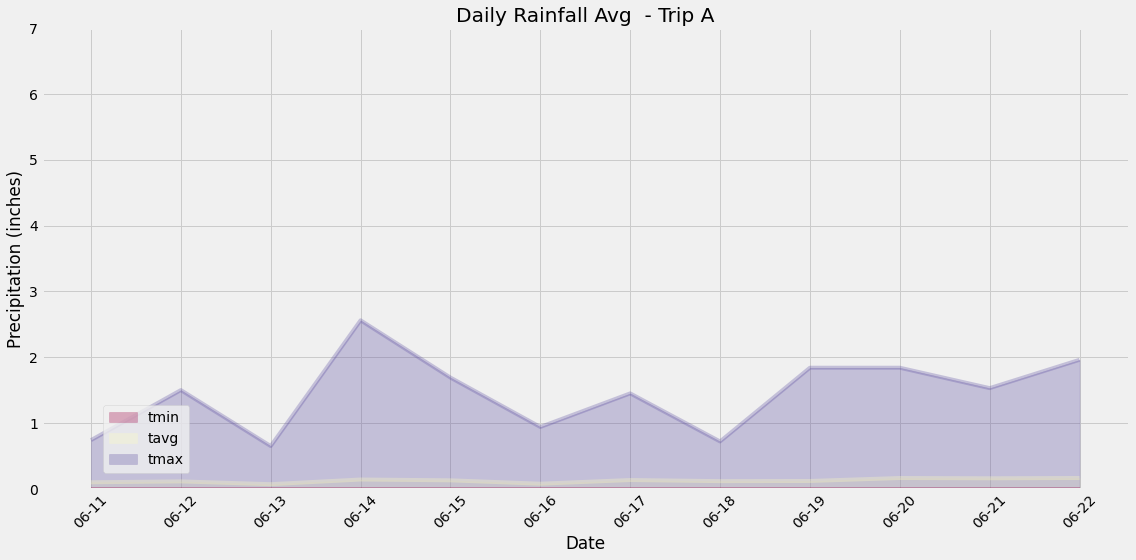

In [47]:
# Plot the daily normals for Trip A as an area plot with `stacked=False`
# Use Pandas dataframe area plotting to plot the selected trip data - Daily Avg Temp - Trip A
x_axis = np.arange(len(df_normalAi))
df_normalAi.plot(kind='area', figsize=(16,8), stacked=False, alpha=0.3, colormap="Spectral")
plt.xticks(x_axis,df_normalAi.index, rotation=45)
plt.ylim(0,7)
plt.legend(loc='lower left', bbox_to_anchor=(0.05,0.02))
plt.title("Daily Rainfall Avg  - Trip A")
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
plt.tight_layout()

plt.savefig(os.path.join("images","daily_avg_rainfall_tripA_" + tripA[0] + ".png"))

plt.show()

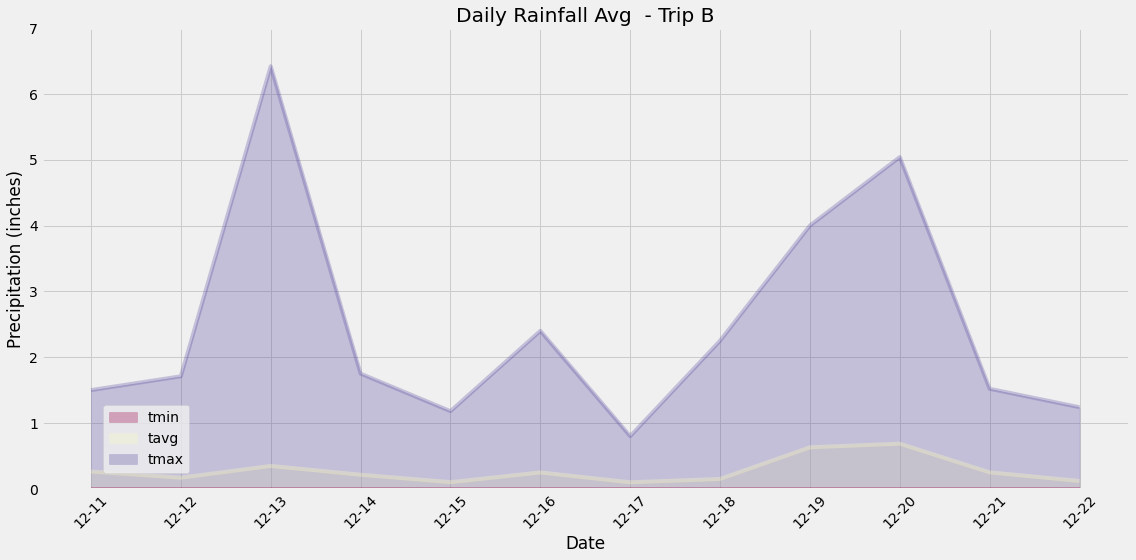

In [48]:
# Plot the daily normals for Trip A as an area plot with `stacked=False`
# Use Pandas dataframe area plotting to plot the selected trip data - Daily Avg Temp - Trip A
x_axis = np.arange(len(df_normalBi))
df_normalBi.plot(kind='area', figsize=(16,8), stacked=False, alpha=0.3, colormap="Spectral")
plt.xticks(x_axis,df_normalBi.index, rotation=45)
plt.ylim(0,7)
plt.legend(loc='lower left', bbox_to_anchor=(0.05,0.02))
plt.title("Daily Rainfall Avg  - Trip B")
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
plt.tight_layout()

plt.savefig(os.path.join("images","daily_avg_rainfall_tripB_" + tripB[0] + ".png"))

plt.show()

In [49]:
# Calculate the total amount of rainfall per weather station for your trip dates 
# Using the previous year's matching dates.
# Sort this in descending order by precipitation amount 
# list the station, name, latitude, longitude, and elevation

In [50]:
# This function called `calc_rainfall` will accept start date and end date in the format '%Y-%m-%d' 
# and return the total precipitation as a list for that range of dates per weather station and station details
def calc_rainfall(start_date, end_date):
    
    return session.query(Measurement.station.label("station"), func.sum(Measurement.prcp).label("prcp"),
                         Station.name.label("name"), Station.latitude.label("latitude"), 
                         Station.longitude.label("longitude"), Station.elevation.label("elevation")).\
        join(Station, Station.station == Measurement.station).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

# function usage example
print(calc_rainfall('2012-02-28', '2012-03-05'))

[('USC00519281', 11.08, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), ('USC00516128', 10.32, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), ('USC00513117', 5.79, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), ('USC00518838', 3.8400000000000003, 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), ('USC00519523', 2.92, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), ('USC00519397', 1.1800000000000002, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), ('USC00511918', 0.76, 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), ('USC00514830', 0.03, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00517948', 0.0, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]


In [51]:
#call function to calculation rainfall totals per weather station for Trip A
tripA_st = calc_rainfall(prev_startA, prev_endA)
df_tripA_station = []

if len(tripA_st) > 0:
    # add retrieved list to dataframe and display
    df_tripA = pd.DataFrame(tripA_st)
    df_tripA_station = df_tripA.set_index("station")
    print("Precipitation totals by weather station for Trip A: ")
else:
    print("ERROR: date selected for 'Trip A' is out of range for the previous year")
    
df_tripA_station

Precipitation totals by weather station for Trip A: 


,prcp,name,latitude,longitude,elevation
station,,,,,
USC00516128,7.25,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
USC00519281,2.67,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00514830,1.30,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00513117,1.09,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00517948,0.60,"PEARL CITY, HI US",21.39340,-157.97510,11.9
USC00519523,0.59,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00519397,0.08,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


In [52]:
#call function to calculation rainfall totals per weather station for Trip B
tripB_st = calc_rainfall(prev_startB, prev_endB)
df_tripB_station = []

if len(tripB_st) > 0:
    # add retrieved list to dataframe and display
    df_tripB = pd.DataFrame(tripB_st)
    df_tripB_station = df_tripB.set_index("station")
    print("Precipitation totals by weather station for Trip B: ")
    df_tripB_station
else:
     print("ERROR: date selected for 'Trip B' is out of range for the previous year")
        
df_tripB_station

Precipitation totals by weather station for Trip B: 


,prcp,name,latitude,longitude,elevation
station,,,,,
USC00516128,2.53,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
USC00519281,2.36,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00513117,1.04,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00519523,0.92,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00514830,0.71,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00519397,0.29,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
USC00517948,0.08,"PEARL CITY, HI US",21.39340,-157.97510,11.9
